# GTEx Published vs GTEx Reprocessed (v32 GDC workflow) DESeq2 Analysis

Three normal "whole blood" non-cancerous tissue samples from GTEx are used to compare their counts published from their GTEx/[Broad Instititute Workflow](https://github.com/broadinstitute/gtex-pipeline/tree/master/rnaseq) vs [GDC's v32 workflow](https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/Expression_mRNA_Pipeline/). GTEx samples used are N7MS, NFK9, and O5YT.

Analysis included in this workflow:
- Pearson correlation
- DESeq2 differential expression
- Relative change
    - Histogram distributions
    - Quantiles

**R version:** 4.2.2

**Bioconductor version:** 3.16

List of packages for this notebook:
- dplyr
- tidyverse
- BiocManager
    - DESeq2
    - EnhancedVolcano

## Installing and loading packages

In [10]:
# Install packages if necessary
if (!require("dplyr", quietly = TRUE))
    install.packages("dplyr")
install.packages("tidyverse")
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager"):
# BiocManager::install(version = "3.16")
BiocManager::install("EnhancedVolcano", dependencies = T)
BiocManager::install("DESeq2", dependencies = T)

# Import libraries
library(dplyr)
library(DESeq2)

# In the case EnhancedVolcano fails to install using BiocManager, pull the package off of github
if (!require("EnhancedVolcano", quietly = TRUE))
    devtools::install_github('kevinblighe/EnhancedVolcano')
library("EnhancedVolcano")

also installing the dependencies 'vctrs', 'cli', 'dplyr', 'jsonlite', 'purrr', 'readxl'




package 'vctrs' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'vctrs'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\00LOCK\vctrs\libs\x64\vctrs.dll to C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\vctrs\libs\x64\vctrs.dll: Permission denied"
Warning message:
"restored 'vctrs'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\00LOCK\cli\libs\x64\cli.dll to C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"


package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"


package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"
Warning message:
"restored 'jsonlite'"


package 'purrr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'purrr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\00LOCK\purrr\libs\x64\purrr.dll to C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\purrr\libs\x64\purrr.dll: Permission denied"
Warning message:
"restored 'purrr'"


package 'readxl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readxl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\00LOCK\readxl\libs\x64\readxl.dll to C:\Users\bryce\anaconda3\envs\rtest\Lib\R\library\readxl\libs\x64\readxl.dll: Permission denied"
Warning message:
"restored 'readxl'"


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bryce\AppData\Local\Temp\RtmpmIEm3u\downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.19), R 4.1.3 (2022-03-10)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'DESeq2'"
Old packages: 'BH', 'BiocManager', 'bit', 'boot', 'bslib', 'cachem', 'cli',
  'colorspace', 'curl', 'data.table', 'digest', 'dplyr', 'dtplyr', 'evaluate',
  'extrafont', 'fansi', 'fastmap', 'fontawesome', 'formatR', 'fs', 'gargle',
  'gert', 'ggbeeswarm', 'ggpubr', 'ggrepel', 'gh', 'gtools', 'haven', 'highr',
  'htmltools', 'htmlwidgets', 'httpuv', 'httr', 'IRkernel', 'isoband',
  'jsonlite', 'knitr', 'locfit', 'MASS', 'Matrix', 'matrixStats', 'mgcv',
  'nlme', 'openssl', 'pbdZMQ', 'pbkrtest', 'pkgbuild', 'pkgdown', 'pkgload',
  'png', 'proj4', 'purrr', 'Rcpp', 'RcppArmadillo', 'RCurl', 'readxl', 'repr',
  'rmarkdown', 

In [11]:
library(dplyr)
library(DESeq2)

## Loading count files and formatting into one dataframe

In [17]:
# Load counts files
setwd(dir = "GTEx_counts/")
filenames <- list.files(pattern = "ed.txt", all.files = T, full.names = T)
filenames

# Store all counts data in list of dataframes
counts <- list()
for (i in seq_along(filenames)) {
    counts[[i]] <- read.table(file = filenames[i], header = T, sep = "\t")
    counts[[i]]$genes <- sub("\\..*", "", counts[[i]]$genes)
    # Remove any duplicate listed genes
    counts[[i]] <- counts[[i]] %>% distinct(genes, .keep_all = T)
}

# names(counts) <- list.files(pattern = "counts.counts", all.files = T)
# names(counts)

# Merge all dataframes in list into one dataframe based on "genes" column
counts.df <- Reduce(function(...) merge(..., by = 'genes'), counts)
head(counts.df)

# Make genes column as row names, remove from dataframe
dimnames(counts.df)[[1]] <- counts.df[,1]
counts.df <- counts.df[, -1]

head(counts.df)

# Reset work directory
setwd(dir = "..")

[1] "./N7MS_published.txt"   "./N7MS_reprocessed.txt" "./NFK9_published.txt"  
[4] "./NFK9_reprocessed.txt" "./O5YT_published.txt"   "./O5YT_reprocessed.txt"

,genes,GTExN7MScountsPUBLISHED,GTExN7MScountsREPROCESSED,GTExNFK9countsPUBLISHED,GTExNFK9countsREPROCESSED,GTExO5YTcountsPUBLISHED,GTExO5YTcountsREPROCESSED
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000000003,4,2,32,17,47,34
2,ENSG00000000005,0,0,0,0,0,0
3,ENSG00000000419,125,88,406,244,1618,899
4,ENSG00000000457,201,106,242,130,1179,585
5,ENSG00000000460,73,47,65,37,139,89
6,ENSG00000000938,16696,10474,15785,9488,167865,94273


,GTExN7MScountsPUBLISHED,GTExN7MScountsREPROCESSED,GTExNFK9countsPUBLISHED,GTExNFK9countsREPROCESSED,GTExO5YTcountsPUBLISHED,GTExO5YTcountsREPROCESSED
,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,4,2,32,17,47,34
ENSG00000000005,0,0,0,0,0,0
ENSG00000000419,125,88,406,244,1618,899
ENSG00000000457,201,106,242,130,1179,585
ENSG00000000460,73,47,65,37,139,89
ENSG00000000938,16696,10474,15785,9488,167865,94273


In [18]:
counts.df

,GTExN7MScountsPUBLISHED,GTExN7MScountsREPROCESSED,GTExNFK9countsPUBLISHED,GTExNFK9countsREPROCESSED,GTExO5YTcountsPUBLISHED,GTExO5YTcountsREPROCESSED
,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,4,2,32,17,47,34
ENSG00000000005,0,0,0,0,0,0
ENSG00000000419,125,88,406,244,1618,899
ENSG00000000457,201,106,242,130,1179,585
ENSG00000000460,73,47,65,37,139,89
ENSG00000000938,16696,10474,15785,9488,167865,94273
ENSG00000000971,45,34,396,252,75,70
ENSG00000001036,255,113,352,189,605,275
ENSG00000001084,295,156,441,207,319,175


In [19]:
## Export dataframe as csv and txt
write.csv(counts.df, "GTEx published vs reprocessed all.csv", row.names = T)
write.table(counts.df, "GTEx published vs processed all.txt", row.names = T, sep = "\t")

## Quick Pearson correlation coefficient calculation between published and reprocessed

In [20]:
print("Pearson's correlation for N7MS:")
cor(counts.df$GTExN7MScountsPUBLISHED, counts.df$GTExN7MScountsREPROCESSED, method = "pearson")

print("Pearson's correlation for NFK9:")
cor(counts.df$GTExNFK9countsPUBLISHED, counts.df$GTExNFK9countsREPROCESSED, method = "pearson")

print("Pearson's correlation for O5YT:")
cor(counts.df$GTExO5YTcountsPUBLISHED, counts.df$GTExO5YTcountsREPROCESSED, method = "pearson")

[1] "Pearson's correlation for N7MS:"


[1] 0.9978011

[1] "Pearson's correlation for NFK9:"


[1] 0.9930493

[1] "Pearson's correlation for O5YT:"


[1] 0.9947381

## DESeq2 setup

In [21]:
# A function to create annotation dataframe from dataframe input, returns the annotation dataframe
createAnnotations <- function(df) {
    colName <- colnames(df)
    condition <- vector()
    for (col in colName) {
        if (grepl("PUBLISHED", col, fixed = T)) {
            # column is PUBLISHED, label as "published"
            condition <- append(condition, "published")
        } else {
            # column is GTEx, label as "reprocessed"
            condition <- append(condition, "reprocessed")
        }
    }
    
    return (data.frame(colName, condition))
}

# Create annotation table for DESeq2
counts.df.meta <- createAnnotations(counts.df)
counts.df.meta

colName,condition
<chr>,<chr>
GTExN7MScountsPUBLISHED,published
GTExN7MScountsREPROCESSED,reprocessed
GTExNFK9countsPUBLISHED,published
GTExNFK9countsREPROCESSED,reprocessed
GTExO5YTcountsPUBLISHED,published
GTExO5YTcountsREPROCESSED,reprocessed


## Perform DESeq2, alpha = 0.05

In [22]:
# A function to get DESEQDataSet (dds) and perform DESeq on it, returns the dds after DESeq
performDeseq <- function(countDf, colDf) {
    dds <- DESeqDataSetFromMatrix(countData = round(countDf), colData = colDf, design= ~ condition)
    dds <- DESeq(dds)
    return (dds)
}

counts.dds <- performDeseq(counts.df, counts.df.meta)

# Get the result from DESeq2 into dataframe, alpha = 0.05
counts.dds.res <- results(counts.dds, alpha = 0.05)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [23]:
counts.dds.res

log2 fold change (MLE): condition reprocessed vs published 
Wald test p-value: condition reprocessed vs published 
DataFrame with 55617 rows and 6 columns
                 baseMean log2FoldChange     lfcSE       stat    pvalue
                <numeric>      <numeric> <numeric>  <numeric> <numeric>
ENSG00000000003   19.5712    -0.01816188  1.081403 -0.0167947  0.986600
ENSG00000000005    0.0000             NA        NA         NA        NA
ENSG00000000419  433.8215    -0.08491260  0.843193 -0.1007036  0.919786
ENSG00000000457  313.4962    -0.27670716  0.695634 -0.3977771  0.690794
ENSG00000000460   68.3305    -0.00742915  0.496849 -0.0149525  0.988070
...                   ...            ...       ...        ...       ...
ENSG00000284592   0.00000             NA        NA         NA        NA
ENSG00000284594   1.02101       3.804321   3.96403  0.9597101  0.337201
ENSG00000284595   0.00000             NA        NA         NA        NA
ENSG00000284596   0.00000             NA        NA   

In [24]:
# Number of genes with p-adjusted value under 0.05
sum(counts.dds.res$padj < 0.05, na.rm = T)

# out of how many genes
dim(counts.df)

[1] 625

[1] 55617     6

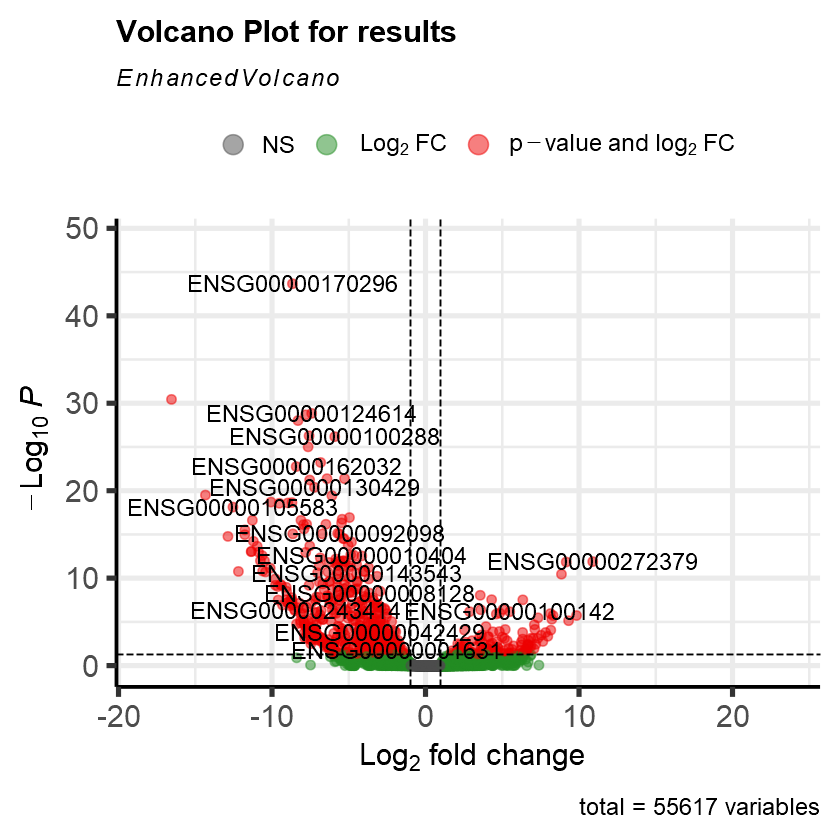

In [25]:
# Make a volcano plot for results
EnhancedVolcano(counts.dds.res,
    lab = rownames(counts.dds.res),
    title = "Volcano Plot for results",
    x = 'log2FoldChange',
    y = 'padj',
    pCutoff = 0.05)

## Relative Change between samples

Relative change between the reprocessed and published counts for each sample. Formula used is `abs((reprocessed - published)) / published`, and quantiles of those relative change difference values are measured. Histogram of differences distribution is included.

### N7MS

,GTExN7MScountsPUBLISHED,GTExN7MScountsREPROCESSED
,<int>,<int>
ENSG00000000003,4,2
ENSG00000000005,0,0
ENSG00000000419,125,88
ENSG00000000457,201,106
ENSG00000000460,73,47
ENSG00000000938,16696,10474


[1] "Quantile:"


0%         10%         25%         50%         75%         90% 
  0.0000000   0.1200000   0.3295455   0.4210526   0.5000000   0.9901262 
        99%        100% 
  4.0000000 194.0000000

[1] "Gene Statistics (difference total, difference > 0.5 to >10):"


[1] 23906

[1] 4648

[1] 993

[1] 134

[1] 49

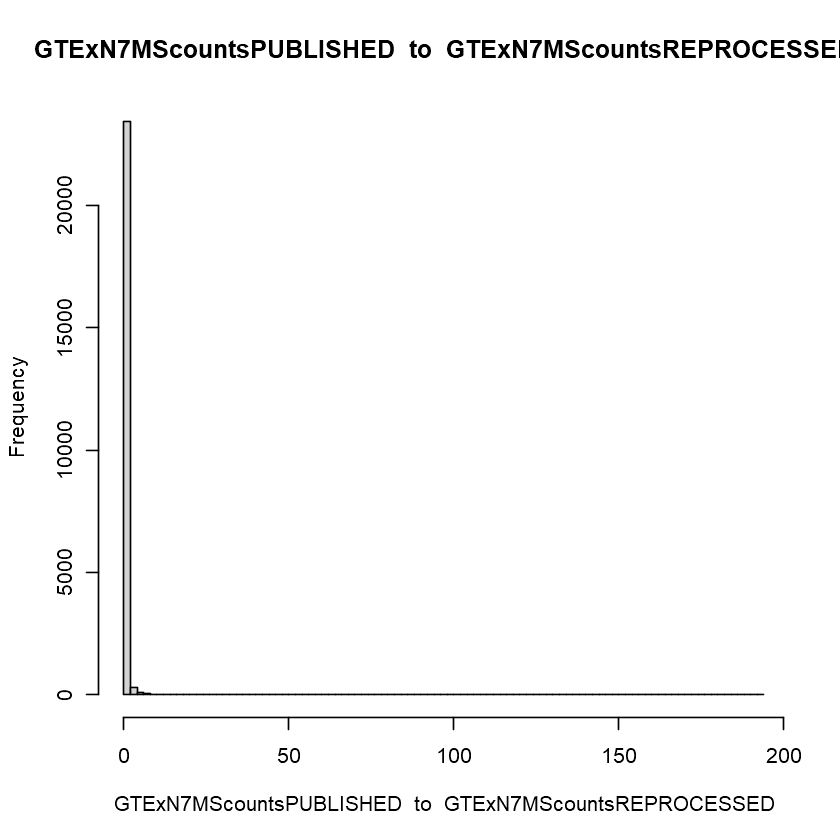

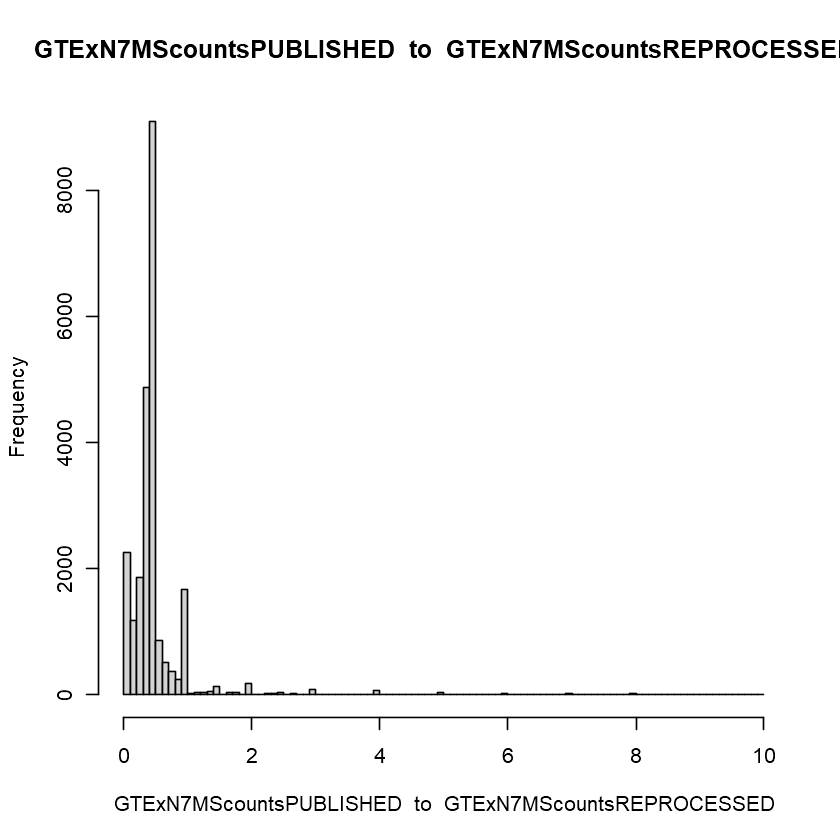

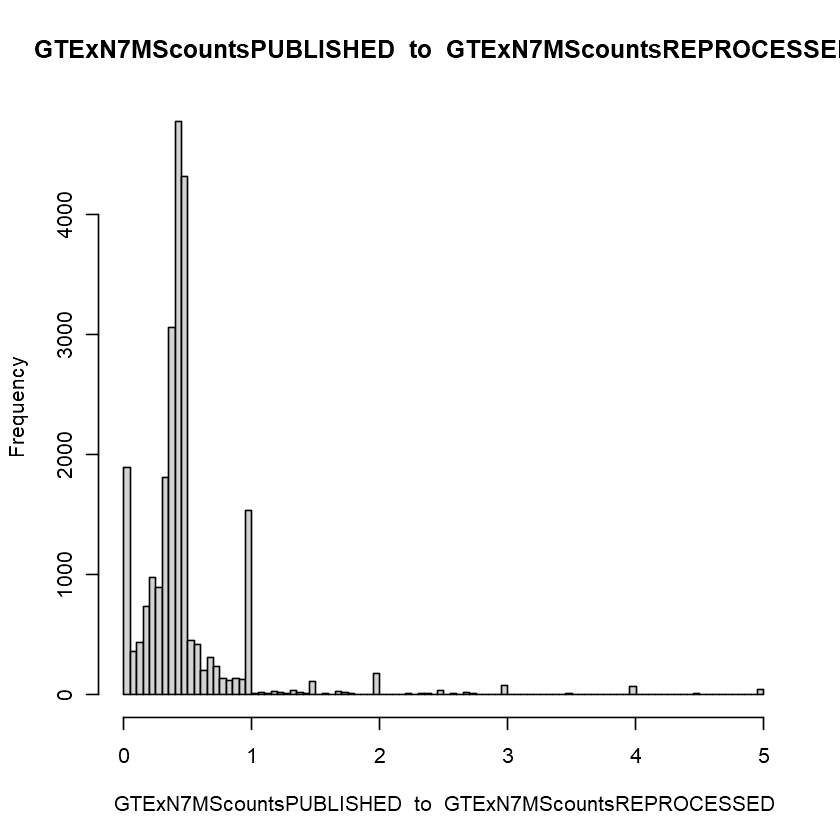

In [50]:
n7ms <- counts.df[,c(1,2)]
head(n7ms)

df <- n7ms
published <- 1
reprocessed <- 2

# Separate vectors for non-NA values and would-be NA values (dividng by zero)
difference <- vector()
tozero <- vector()

name <- paste(colnames(df)[published], " to ", colnames(df)[reprocessed])

# Calculate relative change for each gene
for (k in 1:nrow(df)) {
    if (df[k, published] == 0) { # "divide by zero" results in a seperate vector
        tozero <- append(tozero, df[k, reprocessed])
    } else {
        # relative change value calculated and stored in vector
        change <- abs(df[k, reprocessed] - df[k, published]) / df[k, published]
        difference <- append(difference, change)
    }
}

# histogram for all genes
hist(difference, main = name, xlab = name, nclass = 100)

# quantile
print("Quantile:")
quantile(difference, probs=c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1))

# number of genes statistics
print("Gene Statistics (difference total, difference > 0.5 to >10):")
length (difference)
length(which (difference > 0.5))
length(which (difference > 1))
length(which (difference > 5))
length(which (difference > 10))

# histogram for > 10 difference genes
rm.ind <- which (difference > 10)
difference2 <- difference[-rm.ind]

hist(difference2, main = name, xlab = name, nclass = 100)

# histogram for > 5 difference genes
rm.ind <- which (difference > 5)
difference3 <- difference[-rm.ind]
hist(difference3, main = name, xlab = name, nclass=100)

### NFK9

,GTExNFK9countsPUBLISHED,GTExNFK9countsREPROCESSED
,<int>,<int>
ENSG00000000003,32,17
ENSG00000000005,0,0
ENSG00000000419,406,244
ENSG00000000457,242,130
ENSG00000000460,65,37
ENSG00000000938,15785,9488


[1] "Quantile:"


0%        10%        25%        50%        75%        90%        99% 
 0.0000000  0.1666667  0.3521244  0.4198005  0.5000000  1.0000000  3.2500000 
      100% 
65.0000000

[1] "Gene Statistics (difference total, difference > 0.5 to >10):"


[1] 22086

[1] 4601

[1] 789

[1] 107

[1] 31

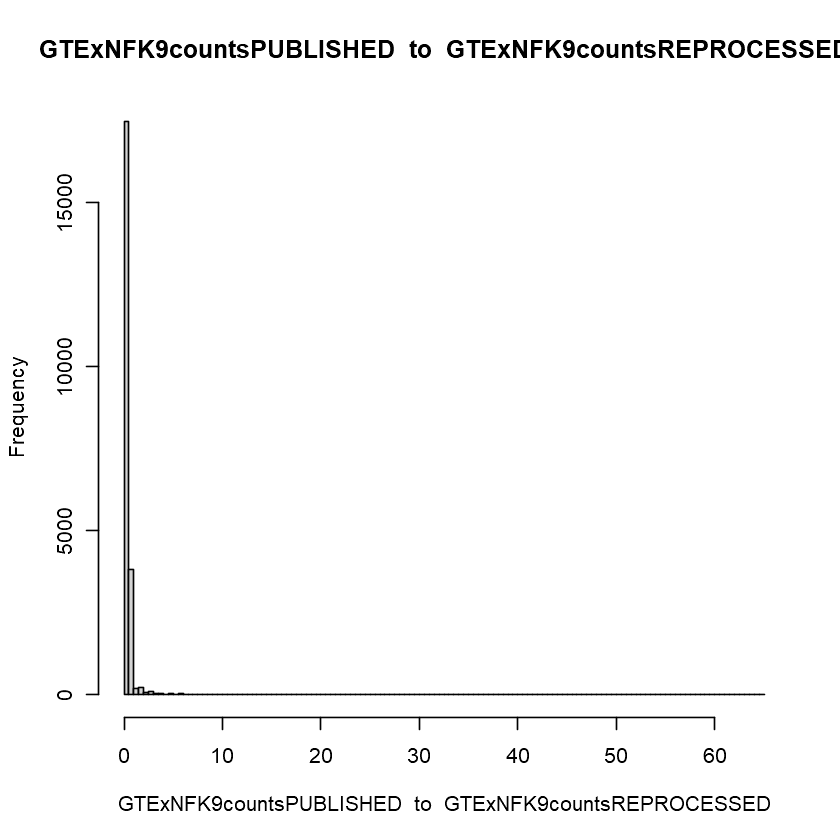

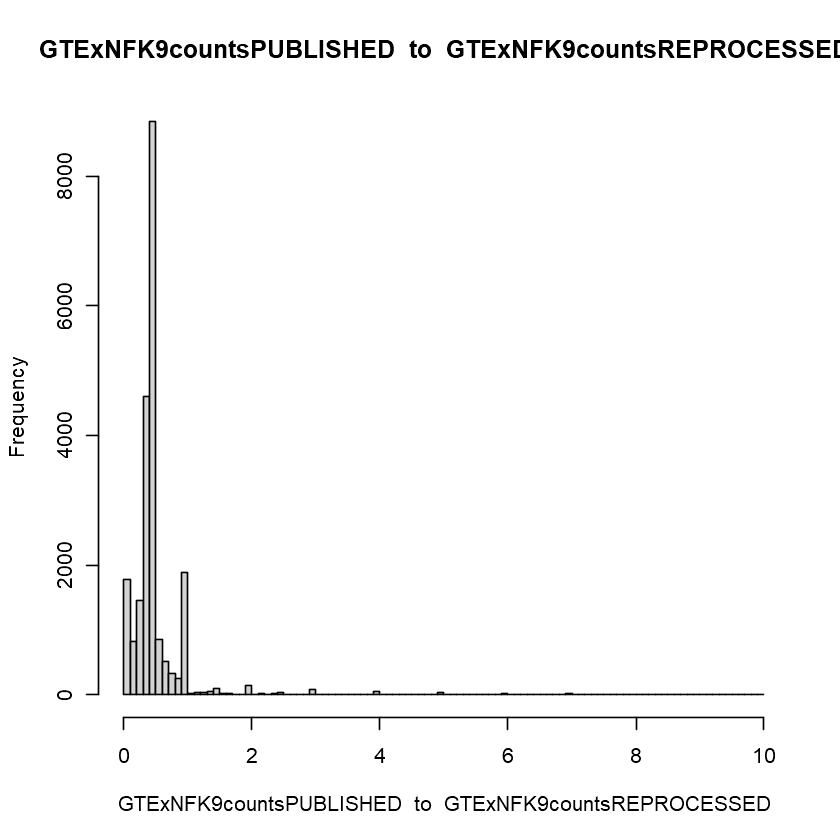

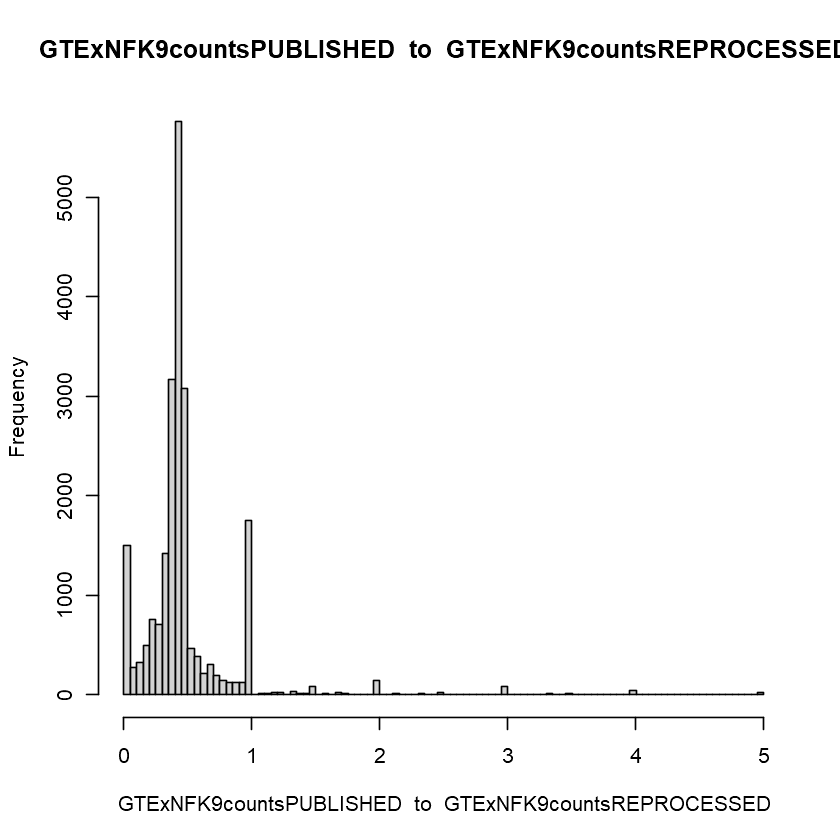

In [51]:
nfk9 <- counts.df[,c(3,4)]
head(nfk9)

df <- nfk9
published <- 1
reprocessed <- 2

difference <- vector()
tozero <- vector()

name <- paste(colnames(df)[published], " to ", colnames(df)[reprocessed])

for (k in 1:nrow(df)) {
    if (df[k, published] == 0) { # "divide by zero" results in a seperate vector
        tozero <- append(tozero, df[k, reprocessed])
    } else {
        # relative change value calculated and stored in vector
        change <- abs(df[k, reprocessed] - df[k, published]) / df[k, published]
        difference <- append(difference, change)
    }
}

# histogram for all genes
hist(difference, main = name, xlab = name, nclass = 100)

# quantile
print("Quantile:")
quantile(difference, probs=c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1))

# number of genes statistics
print("Gene Statistics (difference total, difference > 0.5 to >10):")
length (difference)
length(which (difference > 0.5))
length(which (difference > 1))
length(which (difference > 5))
length(which (difference > 10))

# histogram for > 10 difference genes
rm.ind <- which (difference > 10)
difference2 <- difference[-rm.ind]

hist(difference2, main = name, xlab = name, nclass = 100)

# histogram for > 5 difference genes
rm.ind <- which (difference > 5)
difference3 <- difference[-rm.ind]
hist(difference3, main = name, xlab = name, nclass=100)

### O5YT

,GTExO5YTcountsPUBLISHED,GTExO5YTcountsREPROCESSED
,<int>,<int>
ENSG00000000003,47,34
ENSG00000000005,0,0
ENSG00000000419,1618,899
ENSG00000000457,1179,585
ENSG00000000460,139,89
ENSG00000000938,167865,94273


[1] "Quantile:"


0%         10%         25%         50%         75%         90% 
  0.0000000   0.1019025   0.3333333   0.4388285   0.5043478   1.0000000 
        99%        100% 
  4.0000000 382.0000000

[1] "Gene Statistics (difference total, difference > 0.5 to >10):"


[1] 23997

[1] 6046

[1] 1064

[1] 171

[1] 63

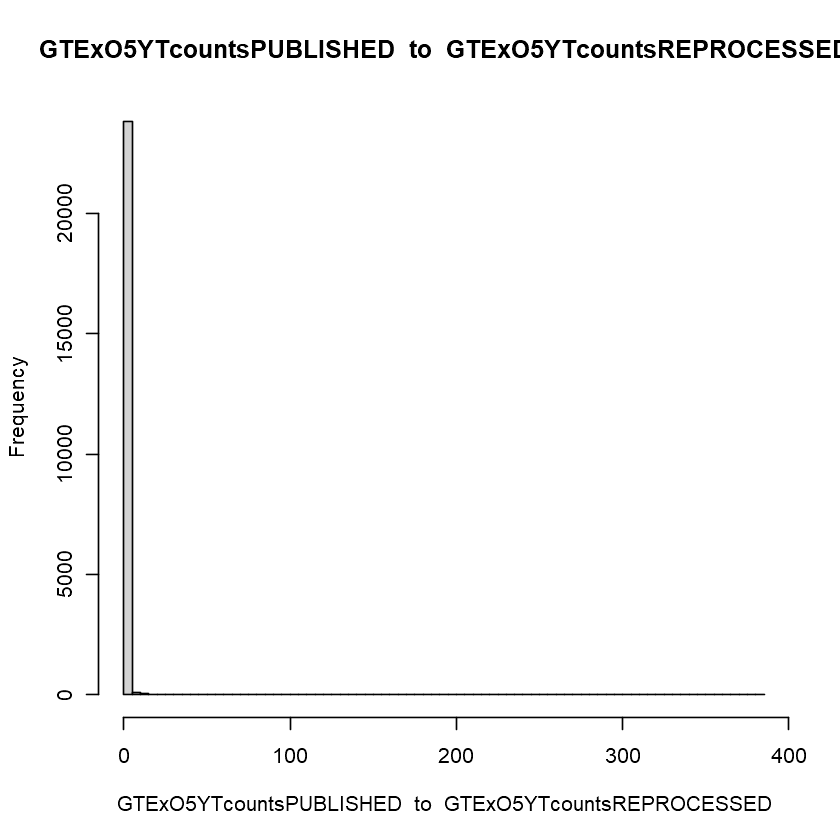

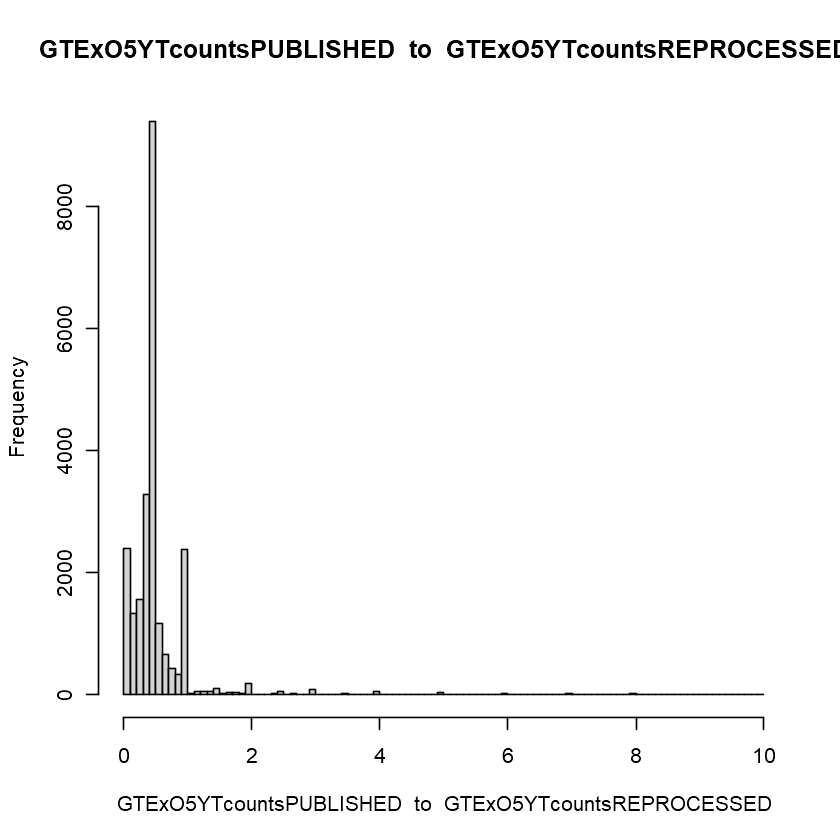

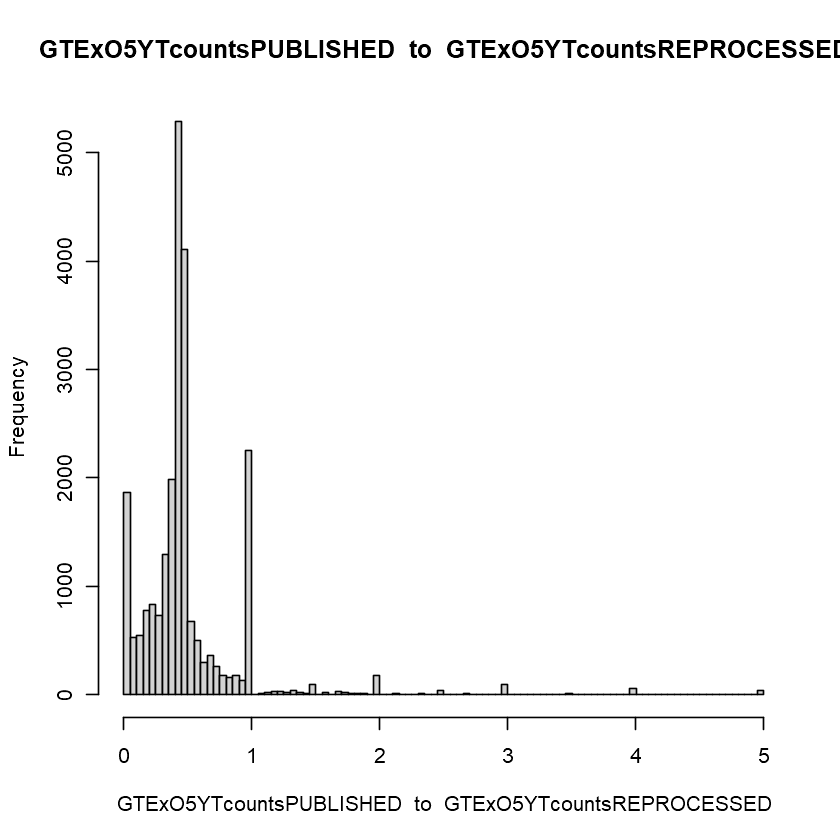

In [52]:
O5yt <- counts.df[,c(5,6)]
head(O5yt)

df <- O5yt
published <- 1
reprocessed <- 2

difference <- vector()
tozero <- vector()

name <- paste(colnames(df)[published], " to ", colnames(df)[reprocessed])

for (k in 1:nrow(df)) {
    if (df[k, published] == 0) { # "divide by zero" results in a seperate vector
        tozero <- append(tozero, df[k, reprocessed])
    } else {
        # relative change value calculated and stored in vector
        change <- abs(df[k, reprocessed] - df[k, published]) / df[k, published]
        difference <- append(difference, change)
    }
}

# histogram for all genes
hist(difference, main = name, xlab = name, nclass = 100)

# quantile
print("Quantile:")
quantile(difference, probs=c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1))

# number of genes statistics
print("Gene Statistics (difference total, difference > 0.5 to >10):")
length (difference)
length(which (difference > 0.5))
length(which (difference > 1))
length(which (difference > 5))
length(which (difference > 10))

# histogram for > 10 difference genes
rm.ind <- which (difference > 10)
difference2 <- difference[-rm.ind]

hist(difference2, main = name, xlab = name, nclass = 100)

# histogram for > 5 difference genes
rm.ind <- which (difference > 5)
difference3 <- difference[-rm.ind]
hist(difference3, main = name, xlab = name, nclass=100)